Problem statement: Mental health has been a growing concern around the world due to the adverse effect it has on the society.
In recent times, lifestyle factors have been considered to be significant determinants for identifying and managing mental health conditions, therefore, experts support from various disciplines have been solicited to help with the identification and administration of lifestyle factors for managing mental health issues.

Value Proposition: This project is going to identify the life style factors and behaviours that indicates mental health disorder 
and also accurately predict the mental health status of individual by answering some of the questions in the project.

Success Metric: The aim is to achieve an accuracy score of about 70 - 95%. Accuracy score between 70 and 78% will be worked on to improve the accuracy score by adding extra data to the dataset and carrying out hyperparameter tuning techniques. 
    

## Importing Libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Reading CSV File

In [2]:
#reading in dataset 
header = ['TS', 'DOB', 'Gender','Country', 'PF', 'PM', 'Ethnicity', 'Education', 'Occupation', 'Workhours', 
          'Breaks', 'Holiday', 'Status', 'Residential', 'Accommodation', 'Religion', 'Childhood', 'Live', 
          'Substance', 'Substance_age', 'Diagnosed', 'Diagnosed_when', 'Symptoms', 'Type', 'Treatment', 
          'Medication','Admitted', 'Age_admitted', 'pathway', 'Chronic_illness', 'FDA', 'CFD', 'DFD', 'AFD', 
          'FDOB', 'FMS', 'MDA', 'CMD', 'DMD', 'AMD', 'MDOB', 'MMS', 'Family_type', 'Family_MHH', 'Family_SH', 
          'Household_income', 'Recent_feeling','CI', 'Forensic_issues', 'Homicide_histrory', 'Social_media', 
          'Time_SM', 'err' ]
mydata = read_csv("Mental Health Questionnaire.csv", names=header, header=None, skiprows=1)
mydata.head()

,TS,DOB,Gender,Country,PF,PM,Ethnicity,Education,Occupation,Workhours,...,Family_MHH,Family_SH,Household_income,Recent_feeling,CI,Forensic_issues,Homicide_histrory,Social_media,Time_SM,err
0,2020/04/12 10:55:12 PM GMT+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/04/12 11:03:39 PM GMT+1,3/27/1986,Male,NaN,2.0,2.0,Black / African / Caribbean / Black British,Certificate,Government and Public Administration,NaN,...,Non,Not applicable,NaN,NaN,NaN,None,None,Facebook;YouTube;WhatApp,2,other
2,2020/04/13 8:53:19 AM GMT+1,6/20/1980,Male,NaN,1.0,1.0,Black / African / Caribbean / Black British,Masters or equivalent,Education and Training,NaN,...,None,Not applicable,NaN,NaN,NaN,None,None,Facebook;WhatApp,3,islam
3,2020/04/25 10:12:39 PM GMT+1,11/26/1986,Male,NaN,4.0,4.0,Black / African / Caribbean / Black British,Masters or equivalent,"Science, Technology, Engineering and Mathematics",8hrs,...,None,Not applicable,Average,"significant tiredness, low energy or problems ...",None,None,None,Facebook;Twitter;YouTube;WhatApp;LinkedIn,3 hrs to 5 hrs,NaN
4,2020/04/25 11:12:09 PM GMT+1,7/6/1985,Female,England,1.0,1.0,Black / African / Caribbean / Black British,Degree or equivalent,Education and Training,Less than 1 hr,...,None,Not applicable,Low,Feeling sad and down,None,None,NaN,Facebook;Instagram;WhatApp,less than 1 hour,NaN


In [3]:
mydata.shape

(547, 53)

## Data Preparation

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TS                 547 non-null    object 
 1   DOB                504 non-null    object 
 2   Gender             530 non-null    object 
 3   Country            522 non-null    object 
 4   PF                 521 non-null    float64
 5   PM                 521 non-null    float64
 6   Ethnicity          530 non-null    object 
 7   Education          531 non-null    object 
 8   Occupation         518 non-null    object 
 9   Workhours          500 non-null    object 
 10  Breaks             500 non-null    float64
 11  Holiday            522 non-null    object 
 12  Status             533 non-null    object 
 13  Residential        533 non-null    object 
 14  Accommodation      530 non-null    object 
 15  Religion           532 non-null    object 
 16  Childhood          534 non

In [5]:
mydata = mydata.drop(['err'], axis=1)


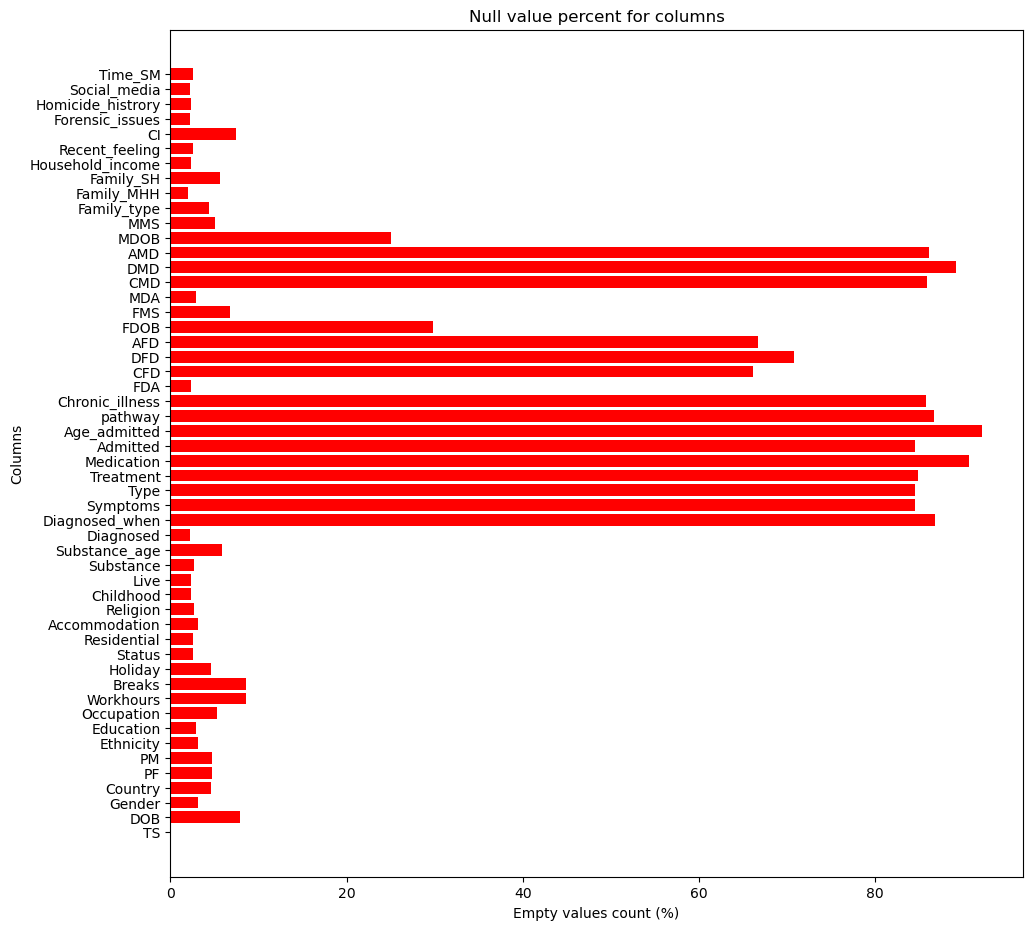

(52,)


In [6]:
# columns null count and plot bar chart
columns_null_count = mydata.isnull().sum(axis=0)
columns_null_percent = [(count/len(mydata))*100 for count in columns_null_count]
columns_pos = range(0, len(columns_null_count))

plt.figure(figsize=(11,11))
plt.barh(columns_pos, columns_null_percent, color='red')
plt.xlabel("Empty values count (%)")
plt.ylabel("Columns")
plt.yticks(columns_pos, mydata.columns)
plt.title("Null value percent for columns")

plt.show()

print(columns_null_count.shape)

Having a deeper look at the dataset, you realize that the following columns:
'Diagnosed_when', 'Symptoms', 'Type', 'Treatment', 'Medication', 'Admitted', 
'Age_admitted', 'pathway', 'Chronic_illness', 'CFD', 'DFD', 'AFD', 'CMD', 'DMD',
'AMD' are null because this questions are based on a previous question. For
example, a respondent whose response to the question have you been diagnosed is No
will not have the option of responding to the question when where you diagnosed, 
hence that column will be blank for that respondent. I will be filling these empty rows
with NA.

In [7]:
#Replacing Null Values in the columns mentioned above with NA
mydata.update(mydata[['Diagnosed_when', 'Symptoms', 'Type', 'Treatment', 'Medication', 'Admitted', 'Age_admitted',
                        'pathway', 'Chronic_illness', 'CFD', 'DFD', 'AFD', 'CMD', 'DMD', 'AMD']].fillna('NA'))

In [8]:
#Displaying sum of null values for each column
mydata.isna().sum()

TS                     0
DOB                   43
Gender                17
Country               25
PF                    26
PM                    26
Ethnicity             17
Education             16
Occupation            29
Workhours             47
Breaks                47
Holiday               25
Status                14
Residential           14
Accommodation         17
Religion              15
Childhood             13
Live                  13
Substance             15
Substance_age         32
Diagnosed             12
Diagnosed_when         0
Symptoms               0
Type                   0
Treatment              0
Medication             0
Admitted               0
Age_admitted           0
pathway                0
Chronic_illness        0
FDA                   13
CFD                    0
DFD                    0
AFD                    0
FDOB                 163
FMS                   37
MDA                   16
CMD                    0
DMD                    0
AMD                    0


In [9]:
mydata.head()

,TS,DOB,Gender,Country,PF,PM,Ethnicity,Education,Occupation,Workhours,...,Family_type,Family_MHH,Family_SH,Household_income,Recent_feeling,CI,Forensic_issues,Homicide_histrory,Social_media,Time_SM
0,2020/04/12 10:55:12 PM GMT+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/04/12 11:03:39 PM GMT+1,3/27/1986,Male,NaN,2.0,2.0,Black / African / Caribbean / Black British,Certificate,Government and Public Administration,NaN,...,Monogamy,Non,Not applicable,NaN,NaN,NaN,None,None,Facebook;YouTube;WhatApp,2
2,2020/04/13 8:53:19 AM GMT+1,6/20/1980,Male,NaN,1.0,1.0,Black / African / Caribbean / Black British,Masters or equivalent,Education and Training,NaN,...,Monogamy,None,Not applicable,NaN,NaN,NaN,None,None,Facebook;WhatApp,3
3,2020/04/25 10:12:39 PM GMT+1,11/26/1986,Male,NaN,4.0,4.0,Black / African / Caribbean / Black British,Masters or equivalent,"Science, Technology, Engineering and Mathematics",8hrs,...,Monogamy,None,Not applicable,Average,"significant tiredness, low energy or problems ...",None,None,None,Facebook;Twitter;YouTube;WhatApp;LinkedIn,3 hrs to 5 hrs
4,2020/04/25 11:12:09 PM GMT+1,7/6/1985,Female,England,1.0,1.0,Black / African / Caribbean / Black British,Degree or equivalent,Education and Training,Less than 1 hr,...,Never married,None,Not applicable,Low,Feeling sad and down,None,None,NaN,Facebook;Instagram;WhatApp,less than 1 hour


In [10]:
#--Confirming that empty columns has been replaced with NA
print(mydata['Diagnosed_when'])

0              NA
1              NA
2              NA
3              NA
4              NA
          ...    
542            NA
543    10/25/2020
544      3/1/2007
545     8/11/2018
546      8/3/2015
Name: Diagnosed_when, Length: 547, dtype: object


In [11]:
# Again get total number of empty values per rows
#for i in range(len(mydata)) :
 #   print(" Total NaN in row", i + 1, ":",
  #        mydata.iloc[i].isnull().sum())

Next step i want to take in preprocessingb my data is to drop rows with over 24 null values. 
Rows with over 50% null value might not have any positive impact on our data set. Hene the
need to get rid of them.

In [12]:
#--Displaying rows with 24 or more missing values
for i in range(len(mydata)):
    empty_row = mydata.iloc[i].isnull().sum()
    if empty_row >=24:
        print(i)

0
23
48
79
174
178
182
216
218
286
512
542


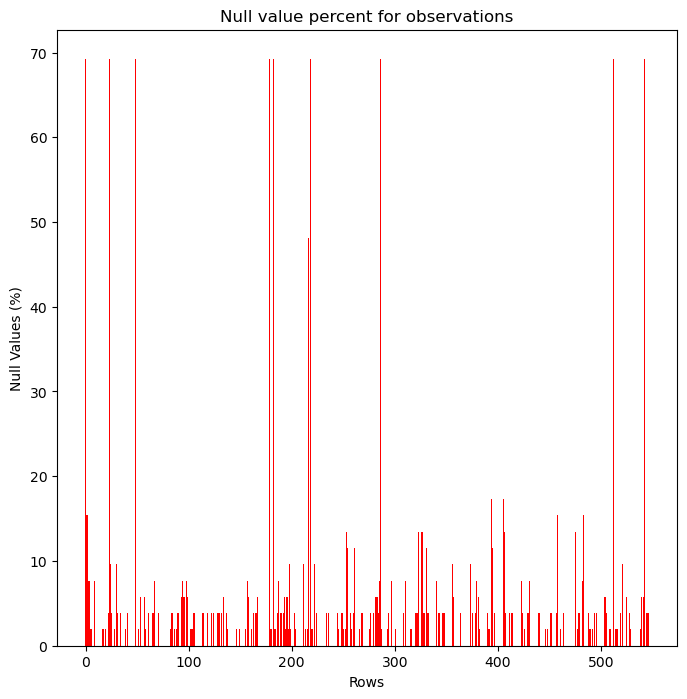

(547,)


In [13]:
# rows null count and plot bar chart
rows_null_count = mydata.isnull().sum(axis=1)
rows_null_percent = [(count/len(mydata.columns))*100 for count in rows_null_count]
rows = range(0, len(rows_null_count))

plt.figure(figsize=(8,8))
plt.bar(rows, rows_null_percent, color='red')
plt.xlabel("Rows")
plt.ylabel("Null Values (%)")
plt.title("Null value percent for observations")

plt.show()

print(rows_null_count.shape)

In [14]:
#--the following row above have over 50% missing value hence we will be dropping this rows.
data = mydata.drop(labels=[0,23,48,79,174,178,182,216,218,286,512,542], axis=0)

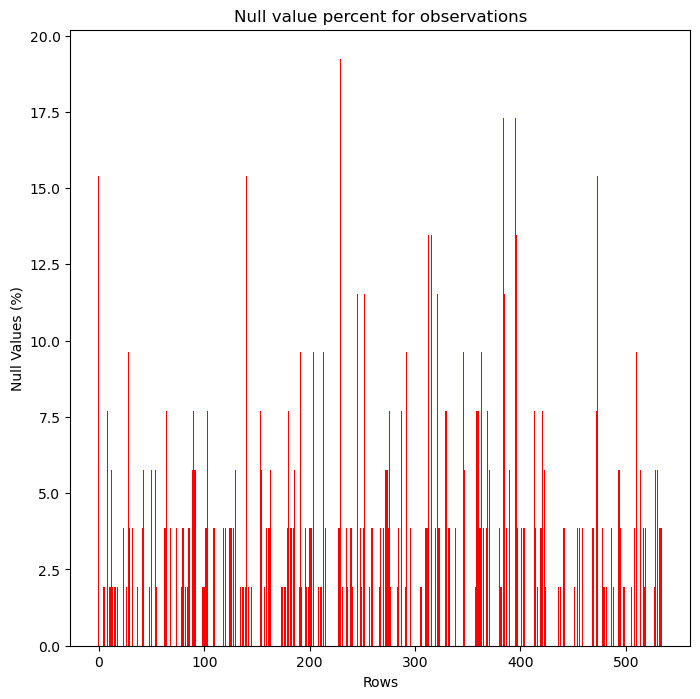

(535,)


In [15]:
# rows null count and plot bar chart
rows_null_count = data.isnull().sum(axis=1)
rows_null_percent = [(count/len(data.columns))*100 for count in rows_null_count]
rows = range(0, len(rows_null_count))

plt.figure(figsize=(8,8))
plt.bar(rows, rows_null_percent, color='red')
plt.xlabel("Rows")
plt.ylabel("Null Values (%)")
plt.title("Null value percent for observations")

plt.show()

print(rows_null_count.shape)

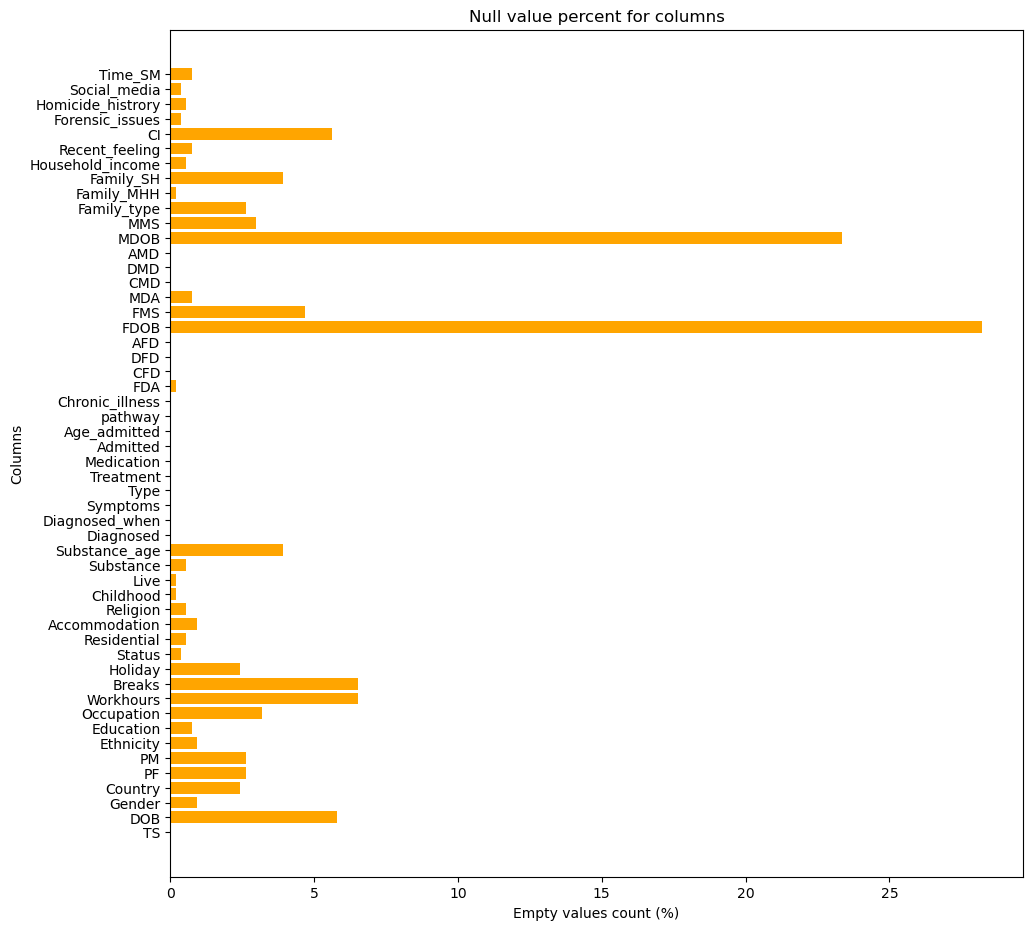

(52,)


In [16]:
# Again get total number of empty values per rows
#for i in range(len(data)) :
 #   print(" Total NaN in row", i + 1, ":",
  #        data.iloc[i].isnull().sum())

# columns null count and plot bar chart
columns_null_count = data.isnull().sum(axis=0)
columns_null_percent = [(count/len(data))*100 for count in columns_null_count]
columns_pos = range(0, len(columns_null_count))

plt.figure(figsize=(11,11))
plt.barh(columns_pos, columns_null_percent, color='orange')
plt.xlabel("Empty values count (%)")
plt.ylabel("Columns")
plt.yticks(columns_pos, data.columns)
plt.title("Null value percent for columns")

plt.show()

print(columns_null_count.shape)

Next step, i am going to use Simple imputer from the SKlearn library to fill our null values with the most frequent value also known as the 'mode'

In [17]:
#--dealing with missing value using SimpleImputer from sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data)
new_data = imputer.transform(data)

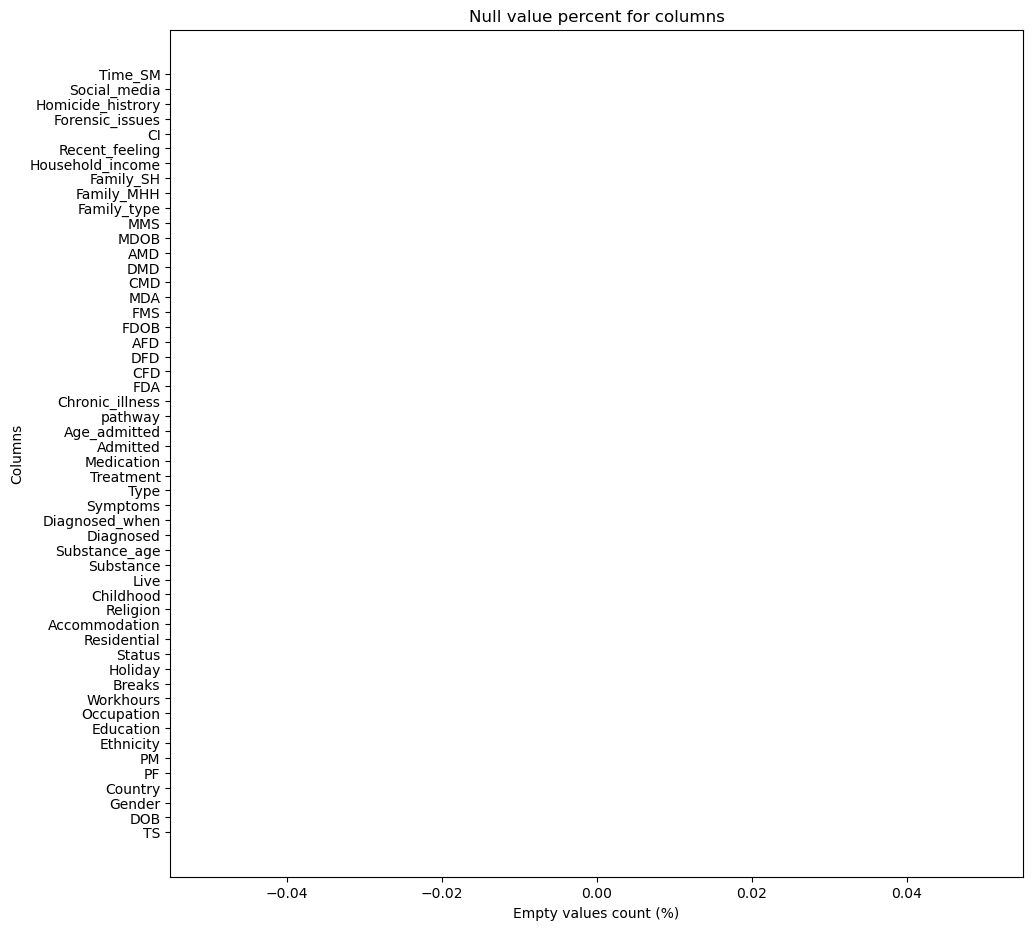

(52,)


In [18]:
new_header = ['TS', 'DOB', 'Gender','Country', 'PF', 'PM', 'Ethnicity', 'Education', 'Occupation', 'Workhours', 
              'Breaks', 'Holiday', 'Status', 'Residential', 'Accommodation', 'Religion', 'Childhood', 'Live', 
              'Substance', 'Substance_age', 'Diagnosed', 'Diagnosed_when', 'Symptoms', 'Type', 'Treatment', 
              'Medication','Admitted', 'Age_admitted', 'pathway', 'Chronic_illness', 'FDA', 'CFD', 'DFD', 'AFD', 
              'FDOB', 'FMS', 'MDA', 'CMD', 'DMD', 'AMD', 'MDOB', 'MMS', 'Family_type', 'Family_MHH', 'Family_SH', 
              'Household_income', 'Recent_feeling','CI', 'Forensic_issues', 'Homicide_histrory', 'Social_media', 
              'Time_SM',]
my_data = pd.DataFrame(data=new_data, columns=new_header)

# Again get total number of empty values per rows
#for i in range(len(my_data)) :
 #   print(" Total NaN in row", i + 1, ":",
  #        my_data.iloc[i].isnull().sum())

# columns null count and plot bar chart
columns_null_count = my_data.isnull().sum(axis=0)
columns_null_percent = [(count/len(my_data))*100 for count in columns_null_count]
columns_pos = range(0, len(columns_null_count))

plt.figure(figsize=(11,11))
plt.barh(columns_pos, columns_null_percent, color='green')
plt.xlabel("Empty values count (%)")
plt.ylabel("Columns")
plt.yticks(columns_pos, my_data.columns)
plt.title("Null value percent for columns")

plt.show()

print(columns_null_count.shape)

# From the above chart you can see that Null values have been completely dealt with.

In [19]:
print('Most frequent date of Birth: \n', my_data['DOB'].mode())

my_data['DOB'].replace(['1378-10-24', '0199-01-29',
                        '0000-09-28' ], '1/1/1988', inplace=True)

Most frequent date of Birth: 
 0    1/1/1988
Name: DOB, dtype: object


In [20]:
#Dropping Columns that have no impact on our model and with very high error

#Dropping the the timestampt column because it has no effect on our data 
my_data.drop(['TS', 'FDOB', 'MDOB', 'Country'], axis=1, inplace=True )
my_data.head()
new_header = ['DOB', 'Gender', 'PF', 'PM', 'Ethnicity', 'Education', 'Occupation', 'Workhours', 'Breaks', 
              'Holiday', 'Status', 'Residential', 'Accommodation', 'Religion', 'Childhood', 'Live', 'Substance', 
              'Substance_age', 'Diagnosed', 'Diagnosed_when', 'Symptoms', 'Type', 'Treatment', 'Medication','Admitted', 
              'Age_admitted', 'pathway', 'Chronic_illness', 'FDA', 'CFD', 'DFD', 'AFD', 'FMS', 'MDA', 'CMD', 'DMD', 'AMD', 
              'MMS', 'Family_type', 'Family_MHH', 'Family_SH', 'Household_income', 'Recent_feeling','CI', 'Forensic_issues',
              'Homicide_histrory', 'Social_media', 'Time_SM',]
my_data.shape

(535, 48)

# Encoding. 

I made use of the Ordinal and Label encoding technique for this project. I used Ordinal encoding to encode the ordinal variables and label encoder for the nominal variables.

In [21]:
# order declaration / order dictionary
OrdinalEncoder = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10}
my_data['PF']=my_data.PF.map(OrdinalEncoder)


OrdinalEncoder = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10}
my_data['PM']=my_data.PM.map(OrdinalEncoder)


OrdinalEncoder = {"Primary":1, "Secondary":2, "Certificate":3, "Degree or equivalent":4, "Masters or equivalent":5,
                  "PHD and above":6}
my_data['Education']=my_data.Education.map(OrdinalEncoder)


OrdinalEncoder = {'Less than 1 hr':1, '2hrs':2, '3hrs':3, '4hrs':4, '5hrs':5, '6hrs':6, '7hrs':7,
                  '8hrs':8, '9hrs':9, '10hrs':10, '11hrs':11, '12hrs':12, '13+hrs':13}
my_data['Workhours']=my_data.Workhours.map(OrdinalEncoder)


OrdinalEncoder = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10}
my_data['Breaks']=my_data.Breaks.map(OrdinalEncoder)


OrdinalEncoder = {'0':1, '1 to 10 days':2, '11 to 20 days':3, '21 to 30 days':4,
                  '30 to 40 days':5, '41 to 50 days plus':6}
my_data['Holiday']=my_data.Holiday.map(OrdinalEncoder)


OrdinalEncoder = {'5 to 15':1, '16 to 25':2, '26 to 35':3, 'Older':4}
my_data['Age_admitted']=my_data.Age_admitted.map(OrdinalEncoder)


OrdinalEncoder = {'15 to 30':1, '31 to 45':2, '46 to 60':3, '61 to 75':4, '76 to 90':5, '91 to 105':6}
my_data['AFD']=my_data.AFD.map(OrdinalEncoder)


OrdinalEncoder = {'15 to 30':1, '31 to 45':2, '46 to 60':3, '61 to 75':4, '76 to 90':5, '91 to 105':6}
my_data['AMD']=my_data.AMD.map(OrdinalEncoder)


OrdinalEncoder = {'less than 1 hour':1, '1 hr to 2 hrs':2, '2':3, '3':4, '3 hrs to 5 hrs':5, 
                  '6 hrs to 10 hrs':6, '10hrs plus':7, 'Option 2':8}
my_data['Time_SM']=my_data.Time_SM.map(OrdinalEncoder)

OrdinalEncoder = {'Low':1, 'Average':2, 'Above average':3, 'high':4}
my_data['Household_income']=my_data.Household_income.map(OrdinalEncoder)

In [22]:
my_data['Recent_feeling'][my_data['Recent_feeling'] != 'None'] = 'Yes'
my_data['Social_media'][my_data['Social_media'] != "I don't use any of the above"] = 'Yes'
my_data['Family_MHH'][my_data['Family_MHH'] != 'None'] = 'Surferred'
my_data['CI'][my_data['CI'] != 'None'] = 'Yes'
my_data['Chronic_illness'][my_data['Chronic_illness'] != 'None'] = 'Yes'
my_data['Substance'][my_data['Substance'] != 'None'] = 'Yes'
my_data['Symptoms'][my_data['Symptoms'] != 'NA'] = 'Yes'
my_data['Type'][my_data['Type'] != 'NA'] = 'Yes'
my_data['Forensic_issues'][my_data['Forensic_issues'] != 'None'] = 'Yes'


In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Enconding our categorical columns using label encoder 
object_cols = ['Gender', 'Ethnicity', 'Education', 'Occupation', 'Workhours', 'Chronic_illness', 
               'Holiday','Status', 'Residential', 'Accommodation', 'Religion', 'Childhood',
               'Live','Substance', 'Substance_age', 'Diagnosed', 'Diagnosed_when', 'Symptoms',
               'Type', 'Treatment', 'Medication','Admitted', 'Age_admitted', 'pathway', 'Recent_feeling',
               'FDA', 'CFD', 'AFD', 'FMS', 'MDA', 'CMD', 'AMD', 'MMS', 'Family_MHH', 'Social_media',
               'Family_type', 'Family_SH',  'CI', 'Forensic_issues', 'Homicide_histrory', 'Time_SM',]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(my_data[col])
    my_data[col] = label_encoder.transform(my_data[col])

In [24]:
my_data.head()

,DOB,Gender,PF,PM,Ethnicity,Education,Occupation,Workhours,Breaks,Holiday,...,Family_type,Family_MHH,Family_SH,Household_income,Recent_feeling,CI,Forensic_issues,Homicide_histrory,Social_media,Time_SM
0,3/27/1986,1,2,2,1,2,6,7,1,1,...,0,1,4,2,0,0,0,0,1,2
1,6/20/1980,1,1,1,1,4,4,7,1,1,...,0,0,4,2,0,0,0,0,1,3
2,11/26/1986,1,4,4,1,4,14,7,1,1,...,0,0,4,2,1,0,0,0,1,4
3,7/6/1985,0,1,1,1,3,4,0,0,0,...,1,0,4,1,1,0,0,0,1,0
4,3/6/1988,1,3,2,1,3,10,8,1,1,...,2,1,4,2,1,0,0,0,1,6


In [25]:
from datetime import datetime
from datetime import date
my_data["DOB"] = pd.to_datetime(my_data["DOB"])

my_data["age"] = my_data["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

In [26]:
print(my_data.shape)
my_data.head()

(535, 49)


,DOB,Gender,PF,PM,Ethnicity,Education,Occupation,Workhours,Breaks,Holiday,...,Family_MHH,Family_SH,Household_income,Recent_feeling,CI,Forensic_issues,Homicide_histrory,Social_media,Time_SM,age
0,1986-03-27,1,2,2,1,2,6,7,1,1,...,1,4,2,0,0,0,0,1,2,38
1,1980-06-20,1,1,1,1,4,4,7,1,1,...,0,4,2,0,0,0,0,1,3,44
2,1986-11-26,1,4,4,1,4,14,7,1,1,...,0,4,2,1,0,0,0,1,4,38
3,1985-07-06,0,1,1,1,3,4,0,0,0,...,0,4,1,1,0,0,0,1,0,39
4,1988-03-06,1,3,2,1,3,10,8,1,1,...,1,4,2,1,0,0,0,1,6,36


In [27]:
my_data.drop(['DOB', 'DFD', 'DMD'], axis=1, inplace=True )
my_data.shape

(535, 46)

In [28]:
new_header = ['Gender', 'PF', 'PM', 'Ethnicity', 'Education', 'Occupation', 'Workhours', 
              'Breaks', 'Holiday', 'Status', 'Residential', 'Accommodation', 'Religion', 'Childhood', 'Live', 
              'Substance', 'Substance_age', 'Diagnosed', 'Diagnosed_when', 'Symptoms', 'Type', 'Treatment', 
              'Medication','Admitted', 'Age_admitted', 'pathway', 'Chronic_illness', 'FDA', 'CFD', 'AFD', 
              'FMS', 'MDA', 'CMD', 'AMD', 'MMS', 'Family_type', 'Family_MHH', 'Family_SH', 
              'Household_income', 'Recent_feeling', 'CI', 'Forensic_issues', 'Homicide_histrory', 'Social_media', 
              'Time_SM',]

In [29]:
#Displaying Unique Values in each column to better understand our dataset 
for col in new_header: 
    print('{} :{} ' . format(col.upper(),my_data[col].unique()))

GENDER :[1 0 3 2] 
PF :[ 2  1  4  3  5  8  6 10  7  9] 
PM :[ 2  1  4  3  7 10  5  9  6  8] 
ETHNICITY :[1 4 0 2 3] 
EDUCATION :[2 4 3 5 1 0] 
OCCUPATION :[ 6  4 14 10  7 16  1  2  3 11  5 15 13  0  9  8 12] 
WORKHOURS :[ 7  0  8 11  9 10  2  6 12  3  5  1  4] 
BREAKS :[ 1  0  4  2  3  5 10  6  8  7] 
HOLIDAY :[1 0 3 2 4 5] 
STATUS :[2 0 3 4 1] 
RESIDENTIAL :[2 5 3 0 4 1] 
ACCOMMODATION :[3 6 7 2 0 5 1 4] 
RELIGION :[7 5 1 6 0 2 3 4] 
CHILDHOOD :[1 0 4 7 6 5 2 3] 
LIVE :[1 6 2 7 5 3 0 4] 
SUBSTANCE :[0 1] 
SUBSTANCE_AGE :[0 9 1 2 4 7 5 3 6 8] 
DIAGNOSED :[0 1] 
DIAGNOSED_WHEN :[63 38 25 54  3 41 62 20 52 17  4 47 44 28 36 31 33 14 39 23 34 60  6 26
 56 49  0 11 59 27 35 48 40 21  5 43 15 50 12 51 61 24 30  9 45  2  1 57
 53 13 37  7 29 46 42 22  8 18 32 16 10 19 55 58] 
SYMPTOMS :[0 1] 
TYPE :[0 1] 
TREATMENT :[6 5 8 0 2 4 7 3 1] 
MEDICATION :[22  8 18  7 13 11 17  4  6 15 16 28 24  3 23 27 25 20  1 14  0 21 19 30
  2  5 29  9 31 12 26 10] 
ADMITTED :[0 1 2] 
AGE_ADMITTED :[4 1 0 2 3] 

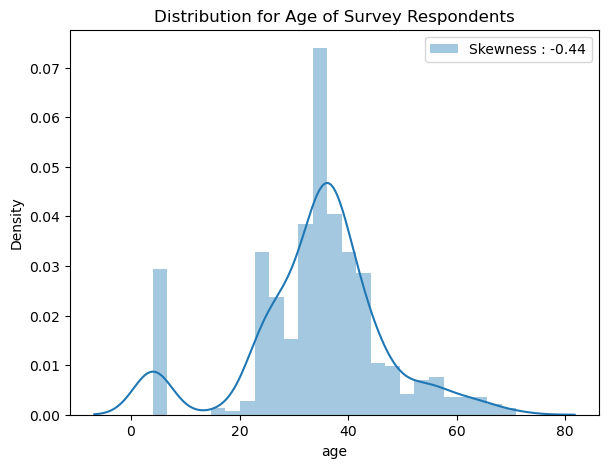

In [30]:
import seaborn as sns
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(my_data['age'], label = 'Skewness : %.2f'%(my_data['age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.show()

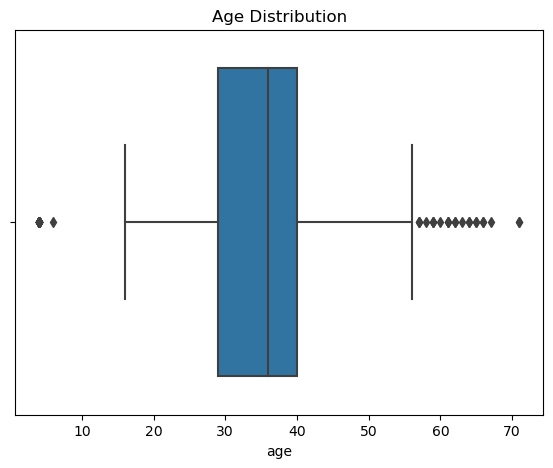

In [31]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.boxplot(x = "age", data = my_data)
plt.title('Age Distribution')
#age = str(my_data['age'].describe().round(2))
#plt.text(56, 0.85, age)
plt.show()

In [32]:
my_data['age'].unique()

array([38, 44, 39, 36, 32, 24, 42, 37, 34, 33, 48, 59,  4, 26, 27, 25, 55,
       43, 23, 28, 47, 45, 29, 21, 31, 30, 46, 62, 40, 41, 52, 50, 54, 22,
       57, 53, 51, 35,  6, 49, 56, 61, 58, 64, 65, 66, 60, 71, 18, 63, 16,
       67], dtype=int64)

In [33]:
print('Most frequent date of Birth: \n', my_data['age'].mode())

my_data['age'].replace([2, 4], 33, inplace=True)

Most frequent date of Birth: 
 0    36
Name: age, dtype: int64


In [34]:
my_data['age'].unique()

array([38, 44, 39, 36, 32, 24, 42, 37, 34, 33, 48, 59, 26, 27, 25, 55, 43,
       23, 28, 47, 45, 29, 21, 31, 30, 46, 62, 40, 41, 52, 50, 54, 22, 57,
       53, 51, 35,  6, 49, 56, 61, 58, 64, 65, 66, 60, 71, 18, 63, 16, 67],
      dtype=int64)

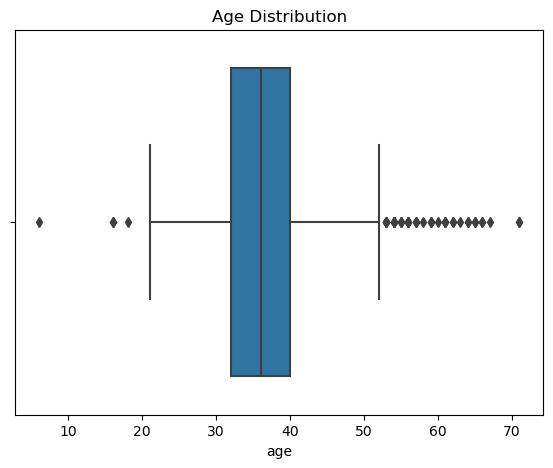

In [35]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.boxplot(x = "age", data = my_data)
plt.title('Age Distribution')
#age = str(my_data['age'].describe().round(2))
#plt.text(56, 0.85, age)
plt.show()

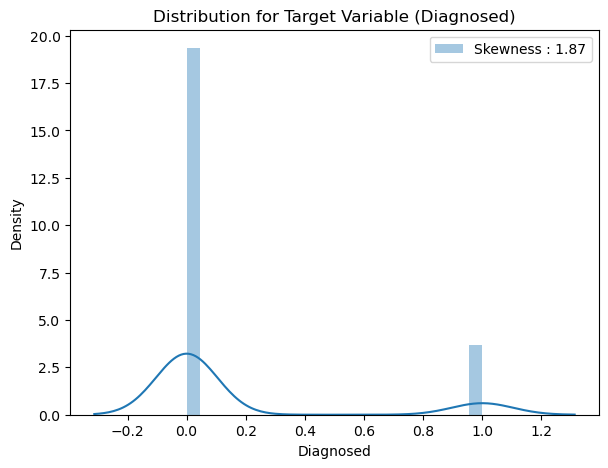

In [36]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(my_data['Diagnosed'], label = 'Skewness : %.2f'%(my_data['Diagnosed'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Target Variable (Diagnosed)')
plt.show()

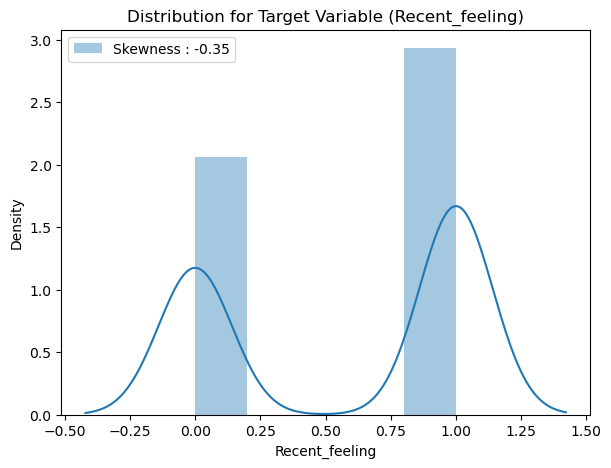

In [37]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(my_data['Recent_feeling'], label = 'Skewness : %.2f'%(my_data['Recent_feeling'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Target Variable (Recent_feeling)')
plt.show()

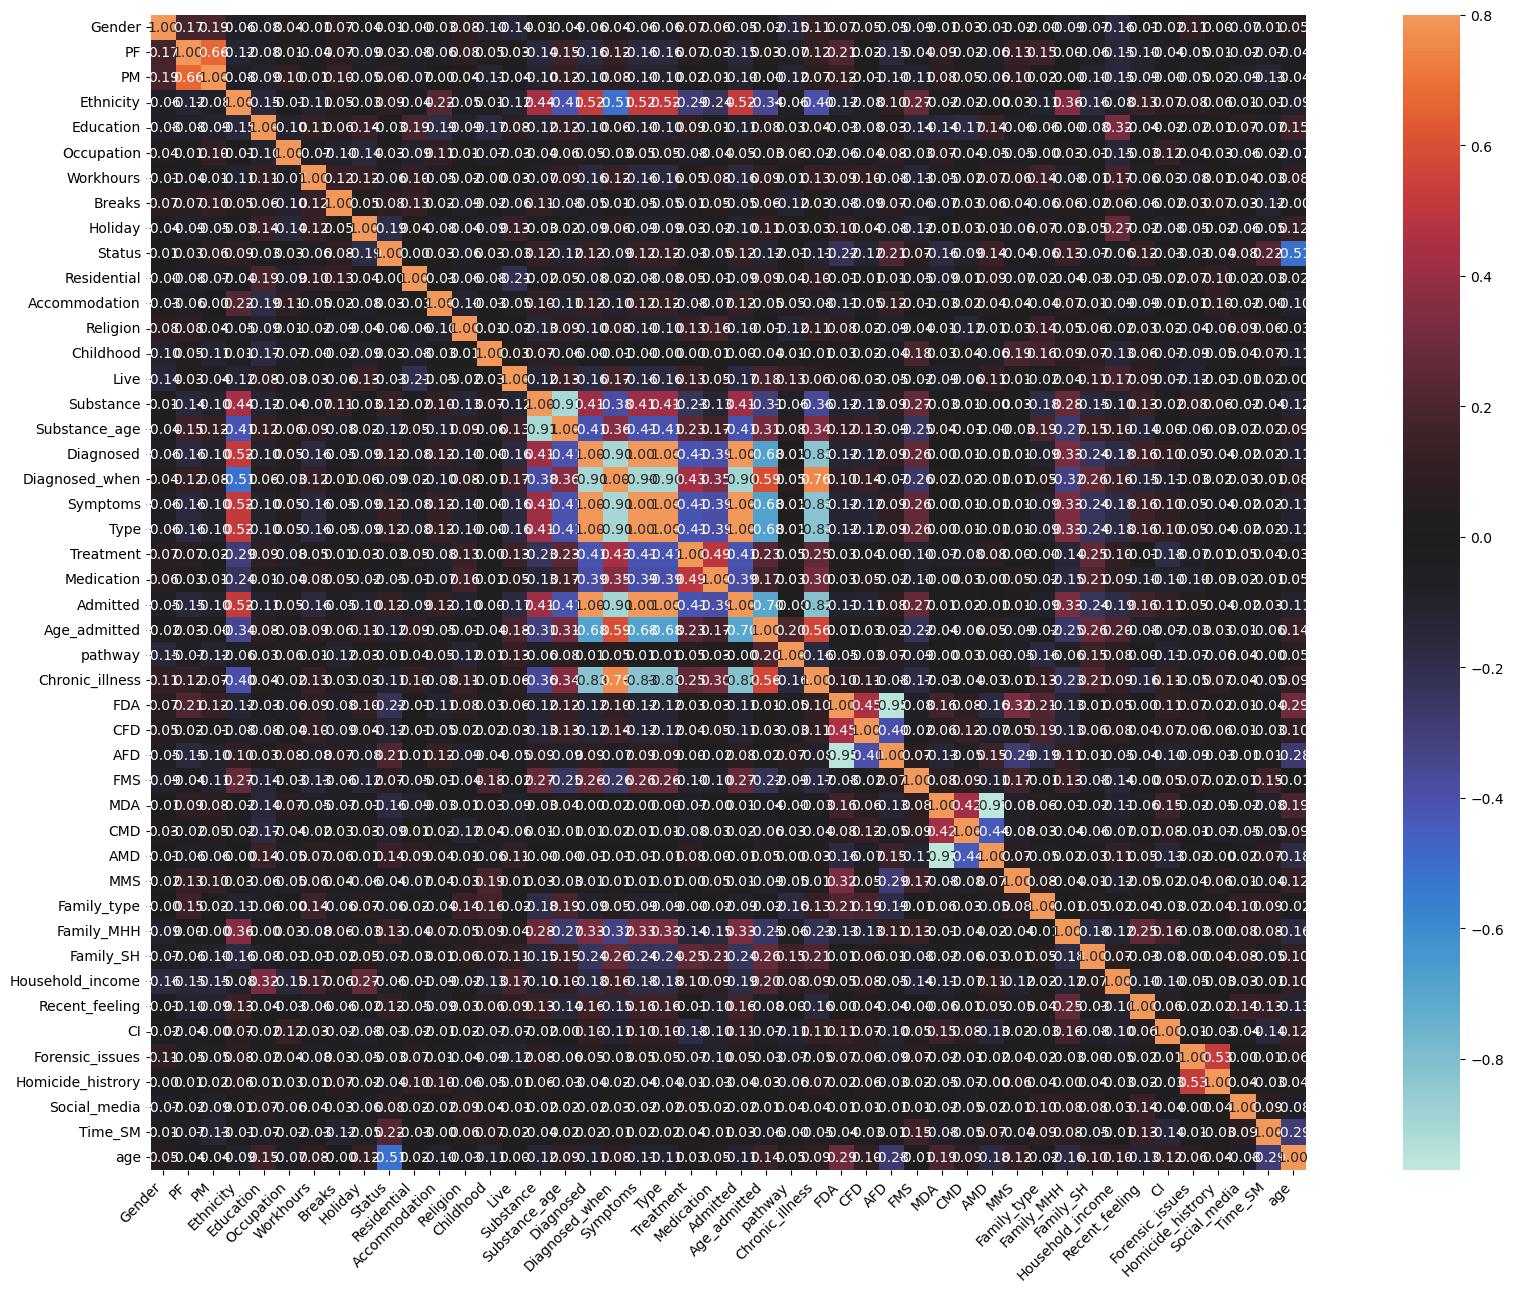

In [38]:
corr = my_data.corr(method="spearman")

f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10}, 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [39]:
corr

,Gender,PF,PM,Ethnicity,Education,Occupation,Workhours,Breaks,Holiday,Status,...,Family_MHH,Family_SH,Household_income,Recent_feeling,CI,Forensic_issues,Homicide_histrory,Social_media,Time_SM,age
Gender,1.000000,0.171840,0.190822,-0.061507,-0.076686,0.043169,-0.012220,0.072084,-0.035734,0.007249,...,-0.094672,-0.070996,-0.164524,-0.009540,-0.019552,0.106430,0.002043,-0.071963,0.006464,0.054468
PF,0.171840,1.000000,0.664316,-0.120842,-0.081770,0.014918,-0.038139,0.067501,-0.085824,0.029327,...,0.000432,-0.056848,-0.151696,-0.100480,-0.044348,-0.046404,0.007853,-0.018120,-0.069665,-0.038531
PM,0.190822,0.664316,1.000000,-0.077751,-0.094593,0.095667,0.010974,0.103154,-0.050957,0.062479,...,-0.001638,-0.097743,-0.154020,-0.093542,-0.003894,-0.052497,0.018915,-0.089175,-0.128252,-0.035177
Ethnicity,-0.061507,-0.120842,-0.077751,1.000000,-0.152475,-0.011922,-0.109354,0.047024,-0.027467,0.092292,...,0.356523,-0.159436,-0.081654,0.132804,0.071407,0.076389,0.060165,0.012438,-0.006013,-0.087228
Education,-0.076686,-0.081770,-0.094593,-0.152475,1.000000,-0.103907,0.112642,0.062020,0.142241,-0.029925,...,-0.001342,-0.084424,0.317927,-0.037391,-0.020653,-0.020685,0.014138,0.065040,-0.066770,0.153070
Occupation,0.043169,0.014918,0.095667,-0.011922,-0.103907,1.000000,-0.065303,-0.097796,-0.142245,0.031672,...,0.030634,-0.014732,-0.145907,-0.032045,0.121393,0.037273,0.025859,-0.056877,-0.017255,-0.074277
Workhours,-0.012220,-0.038139,0.010974,-0.109354,0.112642,-0.065303,1.000000,0.122818,0.117123,-0.058284,...,-0.082334,-0.007225,0.166657,-0.056587,0.030648,-0.075041,0.012165,0.036294,-0.033865,0.082193
Breaks,0.072084,0.067501,0.103154,0.047024,0.062020,-0.097796,0.122818,1.000000,0.045200,0.077261,...,0.059169,-0.024258,0.061602,-0.059501,-0.024109,0.027233,0.071426,0.028082,-0.117024,-0.002363
Holiday,-0.035734,-0.085824,-0.050957,-0.027467,0.142241,-0.142245,0.117123,0.045200,1.000000,-0.187586,...,-0.031323,0.054617,0.269829,-0.020923,-0.083517,-0.054347,-0.015434,-0.061576,-0.050886,0.122225
Status,0.007249,0.029327,0.062479,0.092292,-0.029925,0.031672,-0.058284,0.077261,-0.187586,1.000000,...,0.131526,-0.066078,-0.055878,0.115457,-0.028662,-0.034865,-0.043798,0.084141,0.218940,-0.512964


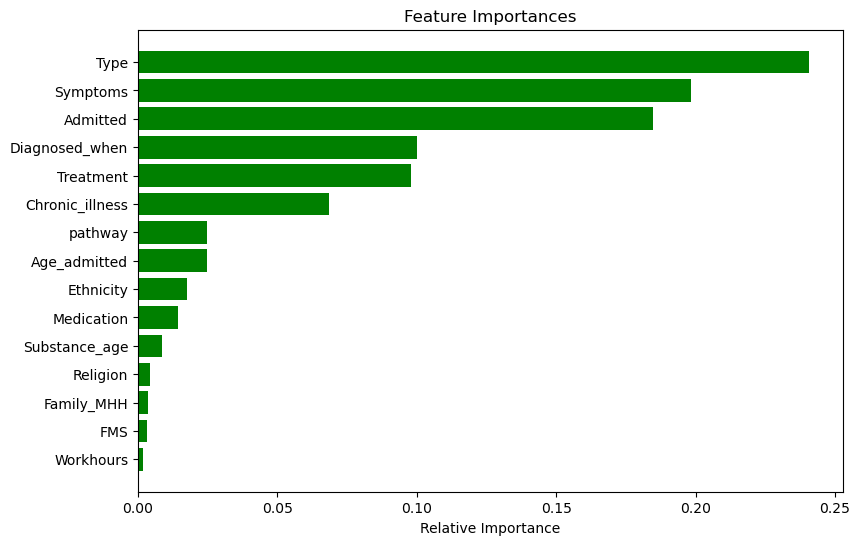

In [40]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_data=my_data.drop(['Diagnosed'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X_data, my_data.Diagnosed)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]
#plot
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
new_cols = ['age', 'Gender', 'PF', 'PM', 'Ethnicity', 'Education', 'Occupation', 'Workhours', 
            'Breaks', 'Holiday', 'Status', 'Residential', 'Accommodation', 'Religion', 'Childhood', 
            'Live', 'Substance', 'Substance_age', 'Diagnosed']

new_data_diagnosed = pd.DataFrame(data=my_data[new_cols], columns=new_cols)

new_data_diagnosed.head()

,age,Gender,PF,PM,Ethnicity,Education,Occupation,Workhours,Breaks,Holiday,Status,Residential,Accommodation,Religion,Childhood,Live,Substance,Substance_age,Diagnosed
0,38,1,2,2,1,2,6,7,1,1,2,2,3,7,1,1,0,0,0
1,44,1,1,1,1,4,4,7,1,1,2,5,3,5,0,1,0,0,0
2,38,1,4,4,1,4,14,7,1,1,2,3,6,5,4,6,0,9,0
3,39,0,1,1,1,3,4,0,0,0,0,0,7,5,7,6,0,9,0
4,36,1,3,2,1,3,10,8,1,1,2,3,3,5,4,6,0,9,0


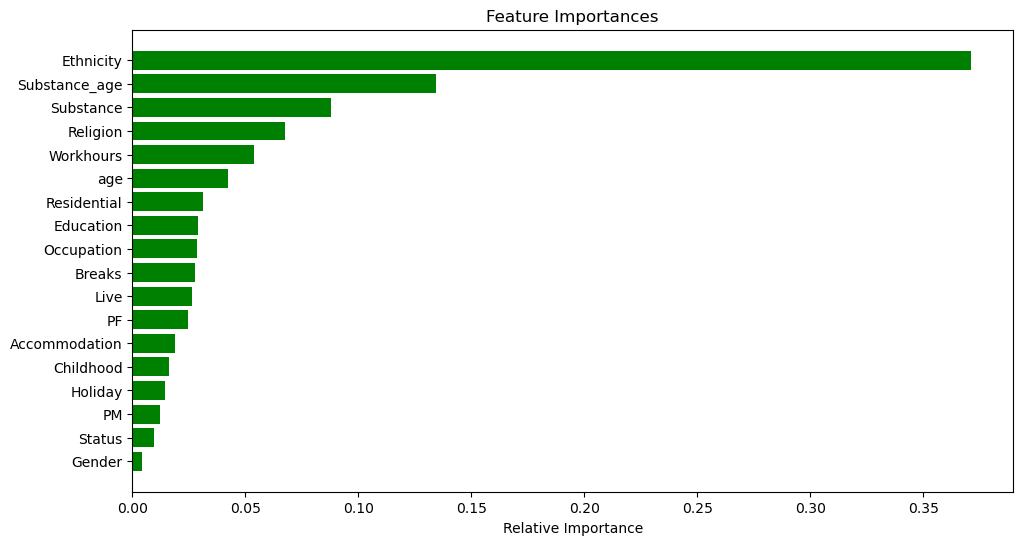

In [42]:
X2_data=new_data_diagnosed.drop(['Diagnosed'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X2_data, new_data_diagnosed.Diagnosed)

train_features = X2_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-30:]
#plot
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

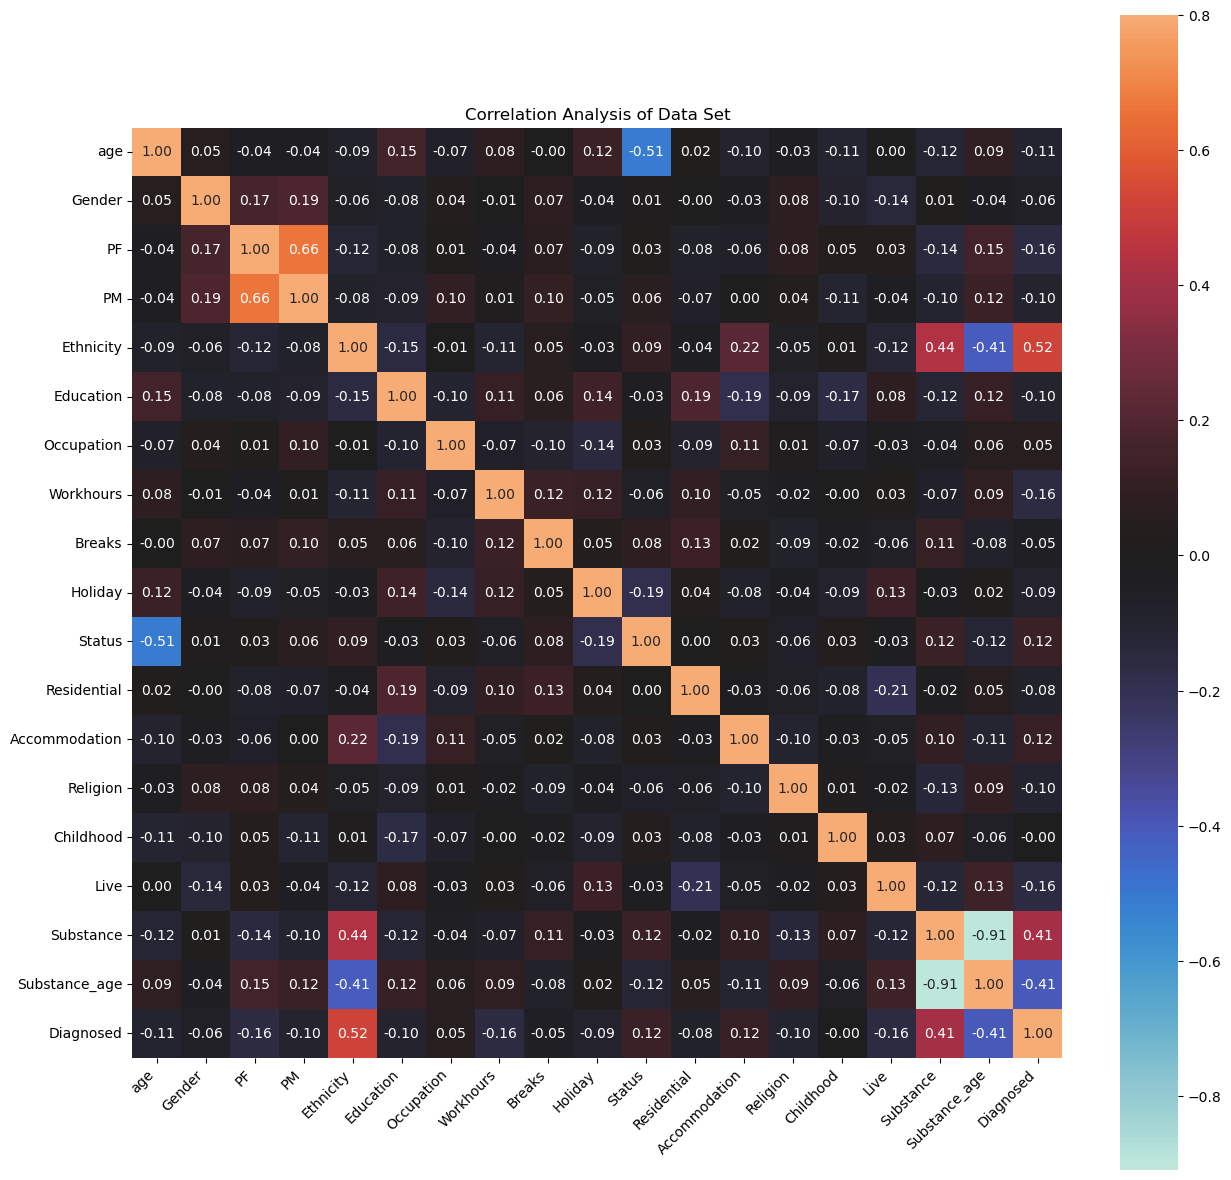

In [43]:
corr_new = new_data_diagnosed.corr(method="spearman")
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_new,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10}, 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Analysis of Data Set')
plt.show()

Text(0.5, 1.0, 'Diagnosed History')

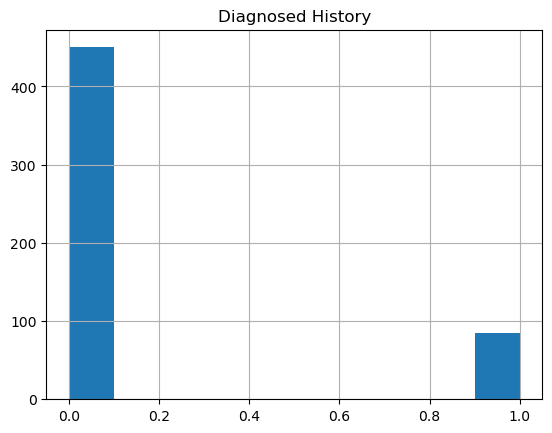

In [44]:
#visualizing the data balance 
new_data_diagnosed['Diagnosed'].hist()
plt.title('Diagnosed History')

<AxesSubplot: ylabel='Diagnosed'>

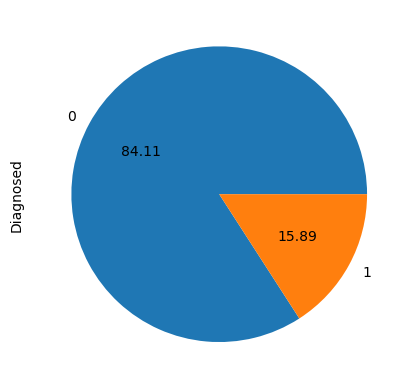

In [45]:
# Show pie plot
new_data_diagnosed['Diagnosed'].value_counts().plot.pie(autopct='%.2f')

In [46]:
#Splitting the data set for training the model
y = new_data_diagnosed.pop('Diagnosed')
X = new_data_diagnosed

print('\n Shape of Target Variable: \n', y.shape)
print('\n Shape of independent Variable: \n', X.shape)


 Shape of Target Variable: 
 (535,)

 Shape of independent Variable: 
 (535, 18)


In [47]:
# spliting the data into train and test splitting using the 70:30 dimension
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('\n Shape of Training Data: \n', X_train.shape)
print('\n Shape of Test Data: \n', X_test.shape)


 Shape of Training Data: 
 (374, 18)

 Shape of Test Data: 
 (161, 18)


In [48]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 257.7/257.7 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
# Using over Sampling method to balance our data
# We will be appliny the Over sampling technique on the training set alone.
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of Diagnosed and Undiagnosed classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (374, 18)
Shape of X after SMOTE: (634, 18)

Balance of Diagnosed and Undiagnosed classes (%):


0    50.0
1    50.0
Name: Diagnosed, dtype: float64

<AxesSubplot: ylabel='Diagnosed'>

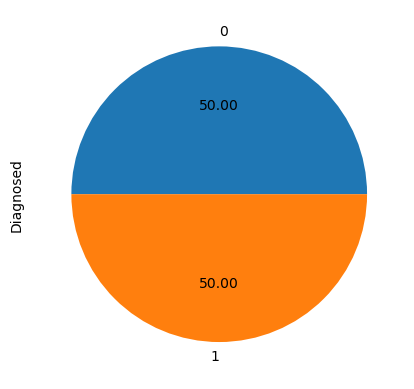

In [50]:
# Show pie plot
y_sm.value_counts().plot.pie(autopct='%.2f')

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
#instantiate Model
model = GradientBoostingClassifier (ccp_alpha=0.0, criterion='friedman_mse', init=None, 
                                    learning_rate=0.05, loss='deviance', max_depth=8, 
                                    max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                    min_samples_leaf=0.1, min_samples_split=6, 
                                    min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None,
                                    random_state=10, subsample=1.0, tol=0.0001, validation_fraction= 0.1,
                                    verbose=0, warm_start=False)
# train model to fit
model.fit(X_sm, y_sm)
#predicting the model
y_pred = model.predict(X_test)
print('\nGradient Boosting Classifier Model:\n', y_pred)


Gradient Boosting Classifier Model:
 [0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0]


In [52]:
#Compute test accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data: {:.2f}'.format(model_accuracy), '\n')

Model Accuracy on Test Data: 0.86 



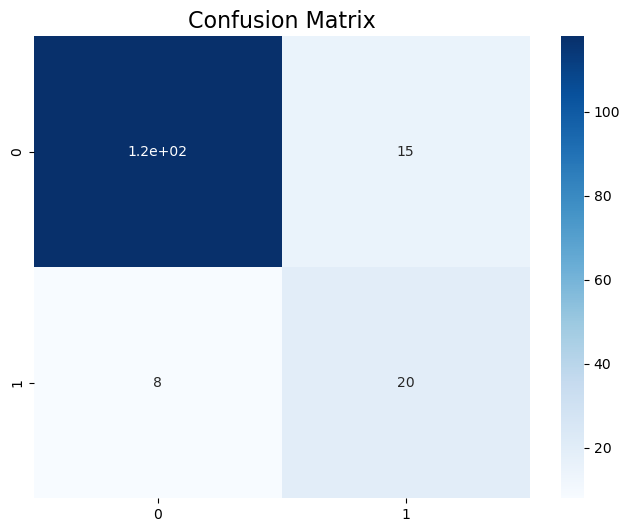

In [53]:
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


In [54]:
class_report = classification_report(y_test, y_pred)
print('\nClassification report on Mental Health Data prediction\n', class_report, '\n')


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       133
           1       0.57      0.71      0.63        28

    accuracy                           0.86       161
   macro avg       0.75      0.80      0.77       161
weighted avg       0.87      0.86      0.86       161
 



In [55]:
#Let's try tuning our model to improve accuracy score
print('\n Hyperparameter of model \n', model.get_params(), '\n')


 Hyperparameter of model 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 10, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 



In [56]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
kfold_split = KFold(n_splits=10)

classifier_hypara = dict()
classifier_hypara['max_depth'] = [2,3,4,6,8,10]
classifier_hypara['learning_rate'] = [0.05, 0.1, 0.3, 0.5]
classifier_hypara['min_samples_split'] = [2,4,6,8,9]
classifier_hypara['min_samples_leaf'] = [0.05,0.1,0.5,1]
classifier_hypara['random_state'] = [1,5,10,15,20]
classifier_hypara['criterion'] = ['gini', 'friedman_mse']

classifier_grid = RandomizedSearchCV(model, classifier_hypara, scoring='accuracy', n_jobs=-1, cv=kfold_split)
classifier_grid_fit = classifier_grid.fit(X_sm, y_sm)

CV_scores = -cross_val_score(classifier_grid_fit, X_sm, y_sm, cv=kfold_split)
print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores.mean()*-1, CV_scores.std()), end='\n\n')

print('\n Suggested Best Hyperparameter: \n', classifier_grid_fit.best_estimator_.get_params())

print('\nBest Score: %s {:.3f} \n'.format(classifier_grid_fit.best_score_))


Cross Val mean: 0.936 (std: 0.056)


 Suggested Best Hyperparameter: 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.3, 'loss': 'deviance', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.05, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Best Score: %s 0.948 



COLUMN 46 'RECENT FEELINGS' MODEL FITTING

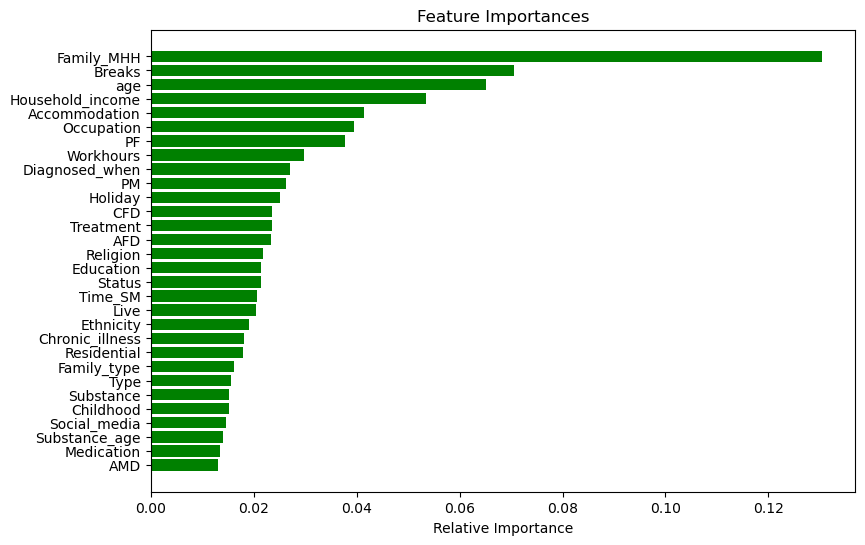

In [57]:
X1_data=my_data.drop(['Recent_feeling'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X1_data, my_data.Recent_feeling)

train_features = X1_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-30:]
#plot
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

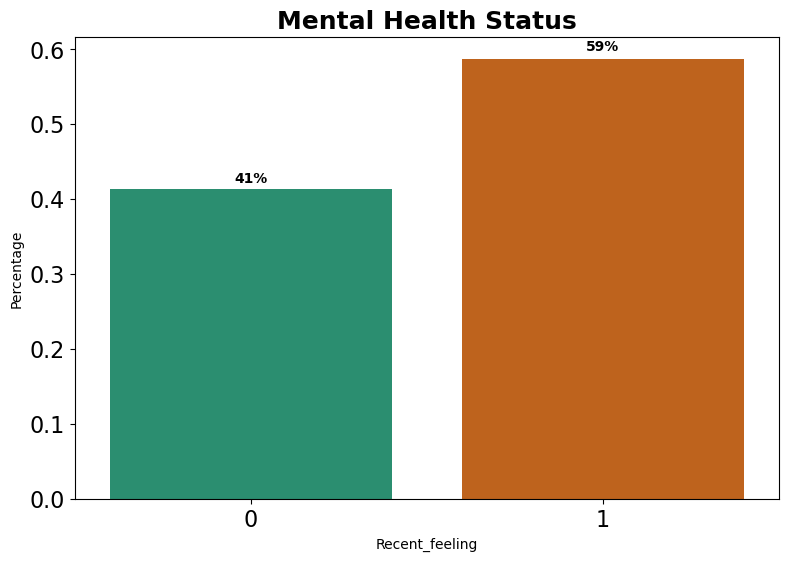

In [58]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = my_data['Recent_feeling'].value_counts(normalize = True).rename_axis('Recent_feeling').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Recent_feeling', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [59]:
my_new_cols = ['age', 'Household_income', 'Family_MHH', 'PF', 'PM', 'CFD', 'AFD', 'Education', 'Occupation', 'Workhours', 
               'Breaks', 'Holiday', 'Status', 'Residential', 'Accommodation', 'Religion', 'Childhood', 'Treatment', 'Time_SM',
               'Live', 'Substance', 'Substance_age', 'Family_type', 'Diagnosed_when', 'Status', 'CMD', 'AMD', 'Type',
               'Chronic_illness', 'Ethnicity', 'Recent_feeling']
# Converting the selected column from our feature engineering to a data frame
fe_new_data = pd.DataFrame(data=my_data[my_new_cols], columns=my_new_cols)

fe_new_data.head()

,age,Household_income,Family_MHH,PF,PM,CFD,AFD,Education,Occupation,Workhours,...,Substance_age,Family_type,Diagnosed_when,Status,CMD,AMD,Type,Chronic_illness,Ethnicity,Recent_feeling
0,38,2,1,2,2,14,6,2,6,7,...,0,0,63,2,2,6,0,1,1,0
1,44,2,0,1,1,14,6,4,4,7,...,0,0,63,2,2,6,0,1,1,0
2,38,2,0,4,4,12,3,4,14,7,...,9,0,63,2,2,6,0,1,1,1
3,39,1,0,1,1,14,6,3,4,0,...,9,1,63,0,2,6,0,1,1,1
4,36,2,1,3,2,14,6,3,10,8,...,9,2,63,2,2,6,0,1,1,1


In [60]:
fe_new_data.shape

(535, 31)

In [61]:
#Splitting the data set for training the model
ydata = fe_new_data.pop('Recent_feeling')
Xdata = fe_new_data

print('\n Shape of Target Variable: \n', ydata.shape)
print('\n Shape of independent Variable: \n', Xdata.shape)


 Shape of Target Variable: 
 (535,)

 Shape of independent Variable: 
 (535, 30)


In [62]:
#from sklearn.preprocessing import MinMaxScaler, normalize

#lets scale the dataset
#min_maxscaler = MinMaxScaler()
#X_scaled = min_maxscaler.fit_transform(Xdata)

#Normalizing the Data
#normalized_X = normalize(X_scaled)

In [63]:
# spliting the data into train and test splitting using the 70:30 dimension
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xdata, ydata, test_size=0.3, random_state=1)
print('\n Shape of Training Data: \n', X_train1.shape)
print('\n Shape of Test Data: \n', X_test1.shape)


 Shape of Training Data: 
 (374, 30)

 Shape of Test Data: 
 (161, 30)


In [64]:
# train model to fit
model.fit(X_train1, y_train1)
#predicting the model
y_pred1 = model.predict(X_test1)
print('\nGradient Boosting Classifier Model:\n', y_pred1)


Gradient Boosting Classifier Model:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1]


In [65]:
#Compute test accuracy
model_accuracy1 = accuracy_score(y_test1, y_pred1)
print('Model Accuracy on Test Data: {:.2f}'.format(model_accuracy1), '\n')

Model Accuracy on Test Data: 0.65 



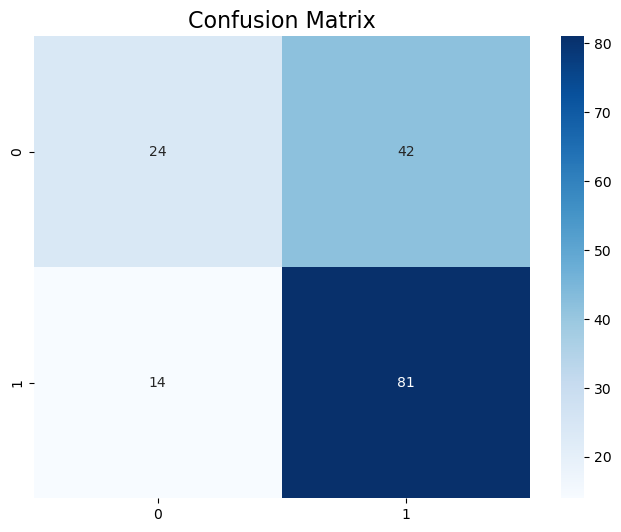

In [66]:
#confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm1, annot=True, cmap='Blues');

In [67]:
#Computing Calssification Report 
class_report = classification_report(y_test1, y_pred1)
print('\nClassification report on Mental Health Data prediction\n', class_report, '\n')


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

           0       0.63      0.36      0.46        66
           1       0.66      0.85      0.74        95

    accuracy                           0.65       161
   macro avg       0.65      0.61      0.60       161
weighted avg       0.65      0.65      0.63       161
 



TRYING A DIFFERENT MODEL ON SAME DATA SET

In [68]:
from sklearn.naive_bayes import MultinomialNB
# instatiate model
model1 = MultinomialNB()
# train model to fit
model1.fit(X_train1, y_train1)
#predicting the model
y_pred2 = model1.predict(X_test1)
print('\nGradient Naive Bayes Multinomial Classifier Model:\n', y_pred1)



Gradient Naive Bayes Multinomial Classifier Model:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1]


In [69]:
#Compute test accuracy
model_accuracy2 = accuracy_score(y_test1, y_pred2)
print('Model Accuracy on Test Data: {:.2f}'.format(model_accuracy2), '\n')

Model Accuracy on Test Data: 0.65 



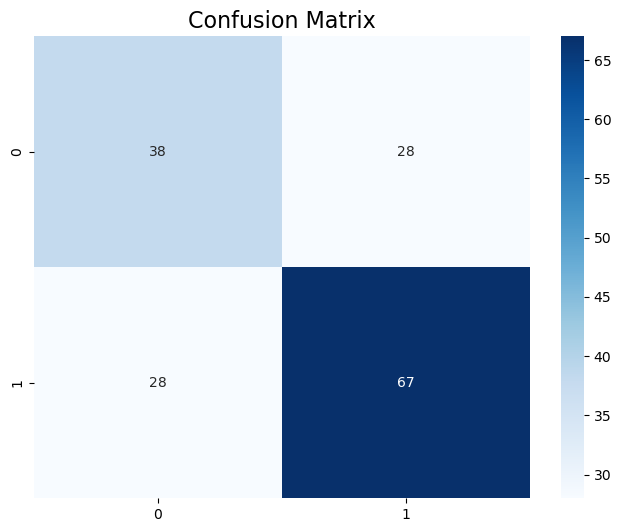

In [70]:
#confusion Matrix
cm2 = confusion_matrix(y_test1, y_pred2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm2, annot=True, cmap='Blues');

In [71]:
#Computing Classification Report 
class_report = classification_report(y_test1, y_pred2)
print('\nClassification report on Mental Health Data prediction\n', class_report, '\n')


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        66
           1       0.71      0.71      0.71        95

    accuracy                           0.65       161
   macro avg       0.64      0.64      0.64       161
weighted avg       0.65      0.65      0.65       161
 



In [72]:
print('\n Hyperparameter of model \n', model1.get_params(), '\n')


 Hyperparameter of model 
 {'alpha': 1.0, 'class_prior': None, 'fit_prior': True} 



In [73]:
#tuning Gradient Boosting model for Recent Feeling Classification prediction

#Hyperparameter Tuning
kfold_split1 = KFold(n_splits=10)

classifier_hypara1 = dict()
classifier_hypara1['max_depth'] = [2,3,4,6,8,10]
classifier_hypara1['learning_rate'] = [0.05, 0.1, 0.3, 0.5]
classifier_hypara1['min_samples_split'] = [2,4,6,8,9]
classifier_hypara1['min_samples_leaf'] = [0.05,0.1,0.5,1]
classifier_hypara1['random_state'] = [1,5,10,15,20]
classifier_hypara1['criterion'] = ['gini', 'friedman_mse']

classifier_grid1 = RandomizedSearchCV(model, classifier_hypara1, scoring='accuracy', n_jobs=-1, cv=kfold_split1)
classifier_grid_fit1 = classifier_grid1.fit(X_train1, y_train1)

CV_scores = -cross_val_score(classifier_grid_fit1, X_train1, y_train1, cv=kfold_split)
print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores.mean()*-1, CV_scores.std()), end='\n\n')

print('\n Suggested Best Hyperparameter: \n', classifier_grid_fit1.best_estimator_.get_params())

print('\nBest Score: %s {:.3f} \n'.format(classifier_grid_fit1.best_score_))


Cross Val mean: 0.697 (std: 0.081)


 Suggested Best Hyperparameter: 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.05, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 10, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Best Score: %s 0.711 



In [74]:
model3 = GradientBoostingClassifier (ccp_alpha=0.0, criterion='friedman_mse', init=None, 
                                     learning_rate=0.05, loss='deviance', max_depth=3, 
                                     max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                     min_samples_leaf=0.1, min_samples_split=8, 
                                     min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None,
                                     random_state=10, subsample=1.0, tol=0.0001, validation_fraction= 0.1,
                                     verbose=0, warm_start=False)
# train model to fit
model3.fit(X_train1, y_train1)
#predicting the model
y_pred3 = model3.predict(X_test1)
print('\nGradient Boosting Classifier Model:\n', y_pred3)


Gradient Boosting Classifier Model:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1]


In [75]:
#Compute test accuracy
model_accuracy3 = accuracy_score(y_test1, y_pred3)
print('Model Accuracy on Test Data After Tuning: {:.2f}'.format(model_accuracy3), '\n')

print('Model Accuracy on Test Data Before Tuning: {:.2f}'.format(model_accuracy1), '\n')

Model Accuracy on Test Data After Tuning: 0.65 

Model Accuracy on Test Data Before Tuning: 0.65 



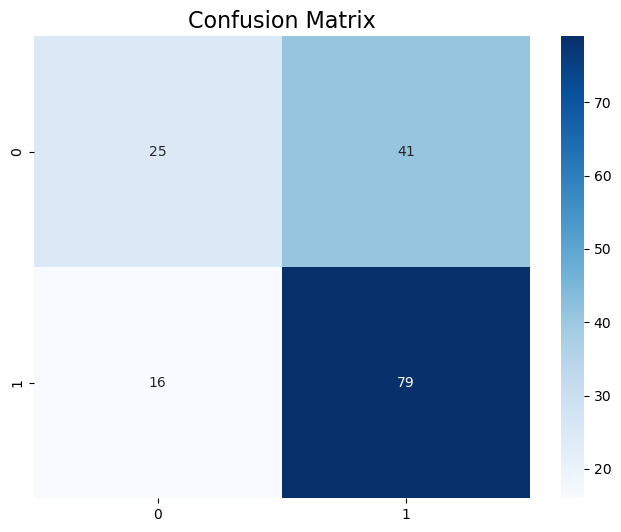

In [76]:
#confusion Matrix
cm2 = confusion_matrix(y_test1, y_pred3)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm2, annot=True, cmap='Blues');

In [77]:
#Computing Classification Report 
class_report = classification_report(y_test1, y_pred3)
print('\nClassification report on Mental Health Data prediction\n', class_report, '\n')


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

           0       0.61      0.38      0.47        66
           1       0.66      0.83      0.73        95

    accuracy                           0.65       161
   macro avg       0.63      0.61      0.60       161
weighted avg       0.64      0.65      0.63       161
 

